**Business Problem Statement**

 Comprehensive Analysis and Mitigation Strategy Development for Air Pollution in the United States

In [132]:
# Data Manipulation Imports
import pandas as pd
import numpy as np
import us # !pip install us

# Data Tests and Analysis
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller

# Machine Leaning Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import scipy.stats as ss

# Data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [133]:
# Global variables
FIGSIZE = (18, 10)
SEED = 123

# Seed for consistent results
np.random.seed(SEED)

# Data Visualization updates
plt.rcParams["figure.figsize"] = FIGSIZE
plt.rcParams.update({'font.size': 14})

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

%config InlineBackend.figure_format = 'retina'

In [134]:
data = pd.read_csv('pollution data\pollution_2000_2023.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\rupsy\AppData\Local\Temp\ipykernel_12000\1716839181.py:1: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv('pollution data\pollution_2000_2023.csv')


In [135]:
print(data)

        Unnamed: 0        Date                                  Address  \
0                0  01-01-2000  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
1                1  02-01-2000  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
2                2  03-01-2000  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
3                3  04-01-2000  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
4                4  05-01-2000  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN   
...            ...         ...                                      ...   
665409      665409  26-06-2023    NCore - North Cheyenne Soccer Complex   
665410      665410  27-06-2023    NCore - North Cheyenne Soccer Complex   
665411      665411  28-06-2023    NCore - North Cheyenne Soccer Complex   
665412      665412  29-06-2023    NCore - North Cheyenne Soccer Complex   
665413      665413  30-06-2023    NCore - North Cheyenne Soccer Complex   

          State    County      City  O3 Mean  O3 1st Max Value  \
0       Arizona  Maricopa   Phoen

In [136]:
data.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,01-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0198,0.040,10,37,0.8789,2.2,23,25,3.0000,9.0,21,13,19.0417,49.0,19,46
1,1,02-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0159,0.032,10,30,1.0667,2.3,0,26,1.9583,3.0,22,4,22.9583,36.0,19,34
2,2,03-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0094,0.016,9,15,1.7625,2.5,8,28,5.2500,11.0,19,16,38.1250,51.0,8,48
3,3,04-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0159,0.033,9,31,1.8292,3.0,23,34,7.0833,16.0,8,23,40.2609,74.0,8,72
4,4,05-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0074,0.012,9,11,2.7000,3.7,2,42,8.7083,15.0,7,21,48.4500,61.0,22,58


In [137]:
data.describe()

,Unnamed: 0,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000,665414.0000
mean,332706.5000,0.0286,0.0390,10.7664,39.1379,0.3295,0.4656,5.9226,5.2474,1.4288,3.9311,8.8673,5.1547,11.5106,23.2535,11.5889,21.7662
std,192088.6203,0.0122,0.0149,3.2973,22.2534,0.2757,0.4345,7.7195,5.0105,2.4101,7.7008,6.7768,10.3715,8.9575,15.2643,7.8883,14.4478
min,0.0000,-0.0007,0.0000,7.0000,0.0000,-0.4375,-0.4000,0.0000,0.0000,-2.5083,-2.3000,0.0000,0.0000,-4.6292,-4.4000,0.0000,0.0000
25%,166353.2500,0.0198,0.0290,9.0000,27.0000,0.1750,0.2000,0.0000,2.0000,0.1739,0.6000,3.0000,0.0000,4.8609,11.0000,5.0000,10.0000
50%,332706.5000,0.0284,0.0380,10.0000,35.0000,0.2583,0.3000,1.0000,3.0000,0.6042,1.4000,8.0000,1.0000,9.3043,21.0000,9.0000,20.0000
75%,499059.7500,0.0369,0.0480,11.0000,44.0000,0.4087,0.6000,9.0000,7.0000,1.6045,4.0000,13.0000,6.0000,15.9583,33.0000,20.0000,31.0000
max,665413.0000,0.1074,0.1400,23.0000,237.0000,7.5083,15.5000,23.0000,201.0000,321.6250,351.0000,23.0000,200.0000,140.6500,371.7000,23.0000,153.0000


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665414 entries, 0 to 665413
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         665414 non-null  int64  
 1   Date               665414 non-null  object 
 2   Address            665414 non-null  object 
 3   State              665414 non-null  object 
 4   County             665414 non-null  object 
 5   City               665414 non-null  object 
 6   O3 Mean            665414 non-null  float64
 7   O3 1st Max Value   665414 non-null  float64
 8   O3 1st Max Hour    665414 non-null  int64  
 9   O3 AQI             665414 non-null  int64  
 10  CO Mean            665414 non-null  float64
 11  CO 1st Max Value   665414 non-null  float64
 12  CO 1st Max Hour    665414 non-null  int64  
 13  CO AQI             665414 non-null  int64  
 14  SO2 Mean           665414 non-null  float64
 15  SO2 1st Max Value  665414 non-null  float64
 16  SO

Data Cleaning

Finding the nulls

In [139]:
data.isnull()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
665410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
665411,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
665412,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


 Handle Duplicates 

In [140]:
print(data.duplicated().sum())  
data


0


,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,01-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0198,0.040,10,37,0.8789,2.2,23,25,3.0000,9.0,21,13,19.0417,49.0,19,46
1,1,02-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0159,0.032,10,30,1.0667,2.3,0,26,1.9583,3.0,22,4,22.9583,36.0,19,34
2,2,03-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0094,0.016,9,15,1.7625,2.5,8,28,5.2500,11.0,19,16,38.1250,51.0,8,48
3,3,04-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0159,0.033,9,31,1.8292,3.0,23,34,7.0833,16.0,8,23,40.2609,74.0,8,72
4,4,05-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0074,0.012,9,11,2.7000,3.7,2,42,8.7083,15.0,7,21,48.4500,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665409,665409,26-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0439,0.050,12,46,0.0000,0.0,0,0,0.1174,0.3,7,0,2.2826,4.3,6,4
665410,665410,27-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0462,0.054,12,50,0.0000,0.0,0,0,0.0917,0.2,8,0,2.2833,5.2,6,5
665411,665411,28-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0466,0.055,7,51,0.0000,0.0,0,0,0.0917,0.2,6,0,2.4875,4.8,19,4
665412,665412,29-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0488,0.056,9,54,0.0000,0.0,0,0,0.0522,0.1,8,0,2.0870,4.1,8,4


 Handle Outliers

In [141]:
Q1 = data['O3 AQI'].quantile(0.25)
Q3 = data['O3 AQI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['O3 AQI'] >= lower_bound) & (data['O3 AQI'] <= upper_bound)]


In [142]:
data

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,01-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0198,0.040,10,37,0.8789,2.2,23,25,3.0000,9.0,21,13,19.0417,49.0,19,46
1,1,02-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0159,0.032,10,30,1.0667,2.3,0,26,1.9583,3.0,22,4,22.9583,36.0,19,34
2,2,03-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0094,0.016,9,15,1.7625,2.5,8,28,5.2500,11.0,19,16,38.1250,51.0,8,48
3,3,04-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0159,0.033,9,31,1.8292,3.0,23,34,7.0833,16.0,8,23,40.2609,74.0,8,72
4,4,05-01-2000,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.0074,0.012,9,11,2.7000,3.7,2,42,8.7083,15.0,7,21,48.4500,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665409,665409,26-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0439,0.050,12,46,0.0000,0.0,0,0,0.1174,0.3,7,0,2.2826,4.3,6,4
665410,665410,27-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0462,0.054,12,50,0.0000,0.0,0,0,0.0917,0.2,8,0,2.2833,5.2,6,5
665411,665411,28-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0466,0.055,7,51,0.0000,0.0,0,0,0.0917,0.2,6,0,2.4875,4.8,19,4
665412,665412,29-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0488,0.056,9,54,0.0000,0.0,0,0,0.0522,0.1,8,0,2.0870,4.1,8,4


In [143]:
data.tail()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
665409,665409,26-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0439,0.050,12,46,0.0,0.0,0,0,0.1174,0.3,7,0,2.2826,4.3,6,4
665410,665410,27-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0462,0.054,12,50,0.0,0.0,0,0,0.0917,0.2,8,0,2.2833,5.2,6,5
665411,665411,28-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0466,0.055,7,51,0.0,0.0,0,0,0.0917,0.2,6,0,2.4875,4.8,19,4
665412,665412,29-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0488,0.056,9,54,0.0,0.0,0,0,0.0522,0.1,8,0,2.0870,4.1,8,4
665413,665413,30-06-2023,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.0483,0.051,7,47,0.0,0.0,0,0,0.0208,0.2,11,0,3.2000,14.8,3,13


In [144]:
from sklearn.model_selection import train_test_split

X = data.drop('O3 AQI', axis=1)  # Features
y = data['O3 AQI']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (489275, 21)
Testing Set Shape: (122319, 21)


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
print(X_train.dtypes)


Unnamed: 0             int64
Date                  object
Address               object
State                 object
County                object
City                  object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI                 int64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI                int64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
dtype: object


In [148]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encode non-numeric columns
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [149]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [150]:
print(X_train.dtypes)


Unnamed: 0             int64
Date                   int64
Address                int64
State                  int64
County                 int64
City                   int64
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI                 int64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI                int64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
dtype: object


In [151]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully!")


Model trained successfully!


In [152]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2.4844327258074177
R² Score: 0.9824202692320843


In [153]:
# Coefficients (importance of each feature)
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)


Coefficients: [-3.99590612e-08  2.77726521e-06 -2.21686746e-04  2.60469880e-03
 -6.19766538e-04  3.58389947e-04 -1.37083111e+01  9.97805709e+02
  3.69226488e-03  2.96253480e-01 -3.95388794e-01  2.21018365e-03
  2.13731071e-02  1.93443603e-02 -5.67215263e-03  2.64492100e-03
  3.70741083e-03  3.39300245e-02  1.44423880e-03 -4.28162972e-03
 -1.69672423e-02]
Intercept: -2.020566900907589


In [154]:
# Example: Predict on a new data row (replace values with actual measurements)
new_data = [[0.020, 0.045, 12, 38, 0.9, 2.5, 20, 26, 4.0, 10.0, 20, 15, 20.0, 50.0, 10, 40]]  # Example
prediction = model.predict(new_data)

print("Prediction (O3 AQI):", prediction)


c:\Users\rupsy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 16 features, but LinearRegression is expecting 21 features as input.

In [81]:
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in X_test:", X_test.shape[1])
print("Features in X_train but not in X_test:", set(X_train.columns) - set(X_test.columns))
print("Features in X_test but not in X_train:", set(X_test.columns) - set(X_train.columns))


Number of features in X_train: 16
Number of features in X_test: 16
Features in X_train but not in X_test: set()
Features in X_test but not in X_train: set()


In [82]:
#If there are mismatched features, align X_train and X_test using pandas.DataFrame.align. This ensures both datasets have the same columns:
X_train, X_test = X_train.align(X_test, join='inner', axis=1)


After alignment, check the shapes again:

In [83]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (489275, 16)
X_test shape: (122319, 16)


Now making Predictions:


In [84]:
#Linear_Regression
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Evaluate the Model:


In [ ]:
For Regression Models:
Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.

In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.486806499526967


In [86]:
#Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values.
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.8774610597198841


In [87]:
#R² Score (Coefficient of Determination): Indicates the proportion of variance in the target variable explained by the model.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9824034725193135


Visualize Residuals:

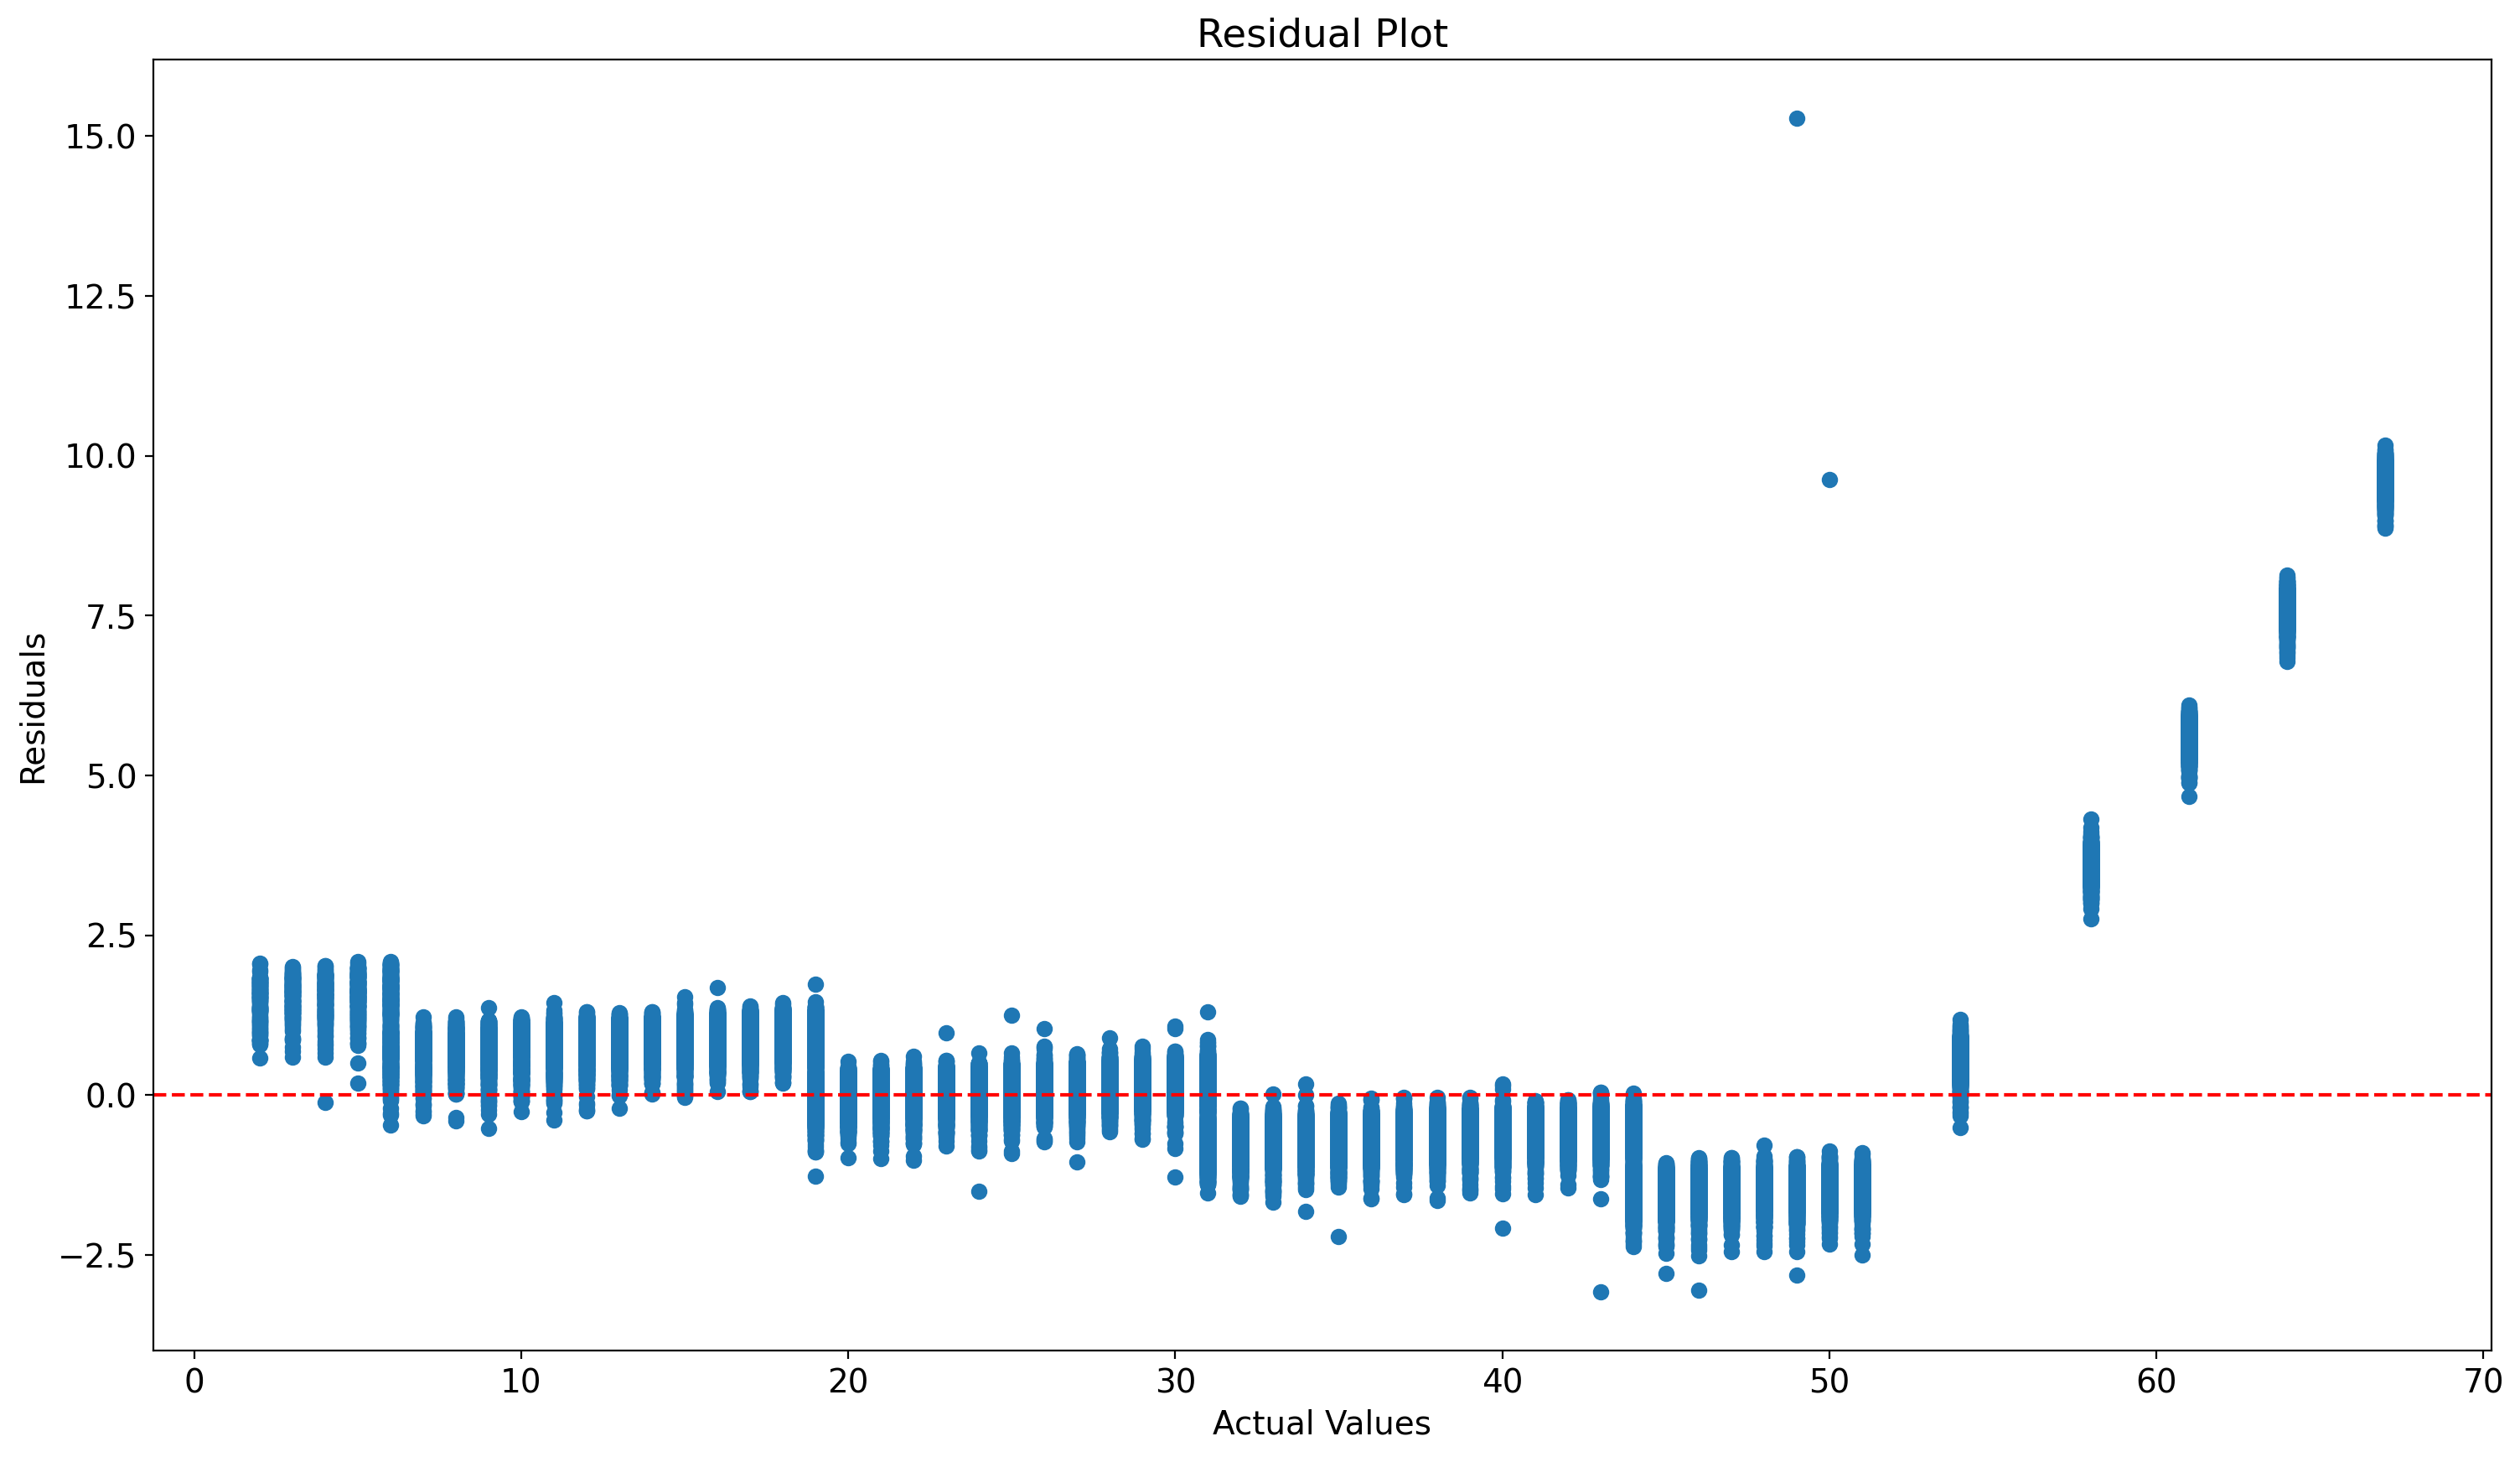

In [ ]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Fine-Tune the Model:

 Save the Model:

In [89]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved!")


Model saved!


Problem Statements:


In [ ]:
#1) Compute the mean, median, and standard deviation for each numeric column in the dataset.
# Summary statistics
stats = df.describe()
print(stats)


        Unnamed: 0      O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
count  665414.0000  665414.0000       665414.0000      665414.0000   
mean   332706.5000       0.0286            0.0390          10.7664   
std    192088.6203       0.0122            0.0149           3.2973   
min         0.0000      -0.0007            0.0000           7.0000   
25%    166353.2500       0.0198            0.0290           9.0000   
50%    332706.5000       0.0284            0.0380          10.0000   
75%    499059.7500       0.0369            0.0480          11.0000   
max    665413.0000       0.1074            0.1400          23.0000   

            O3 AQI      CO Mean  CO 1st Max Value  CO 1st Max Hour  \
count  665414.0000  665414.0000       665414.0000      665414.0000   
mean       39.1379       0.3295            0.4656           5.9226   
std        22.2534       0.2757            0.4345           7.7195   
min         0.0000      -0.4375           -0.4000           0.0000   
25%        27.0000 

In [ ]:
#2) Identify and handle any missing values in the dataset.
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values
df_cleaned = df.dropna()


Missing values in each column:
 Unnamed: 0           0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
dtype: int64


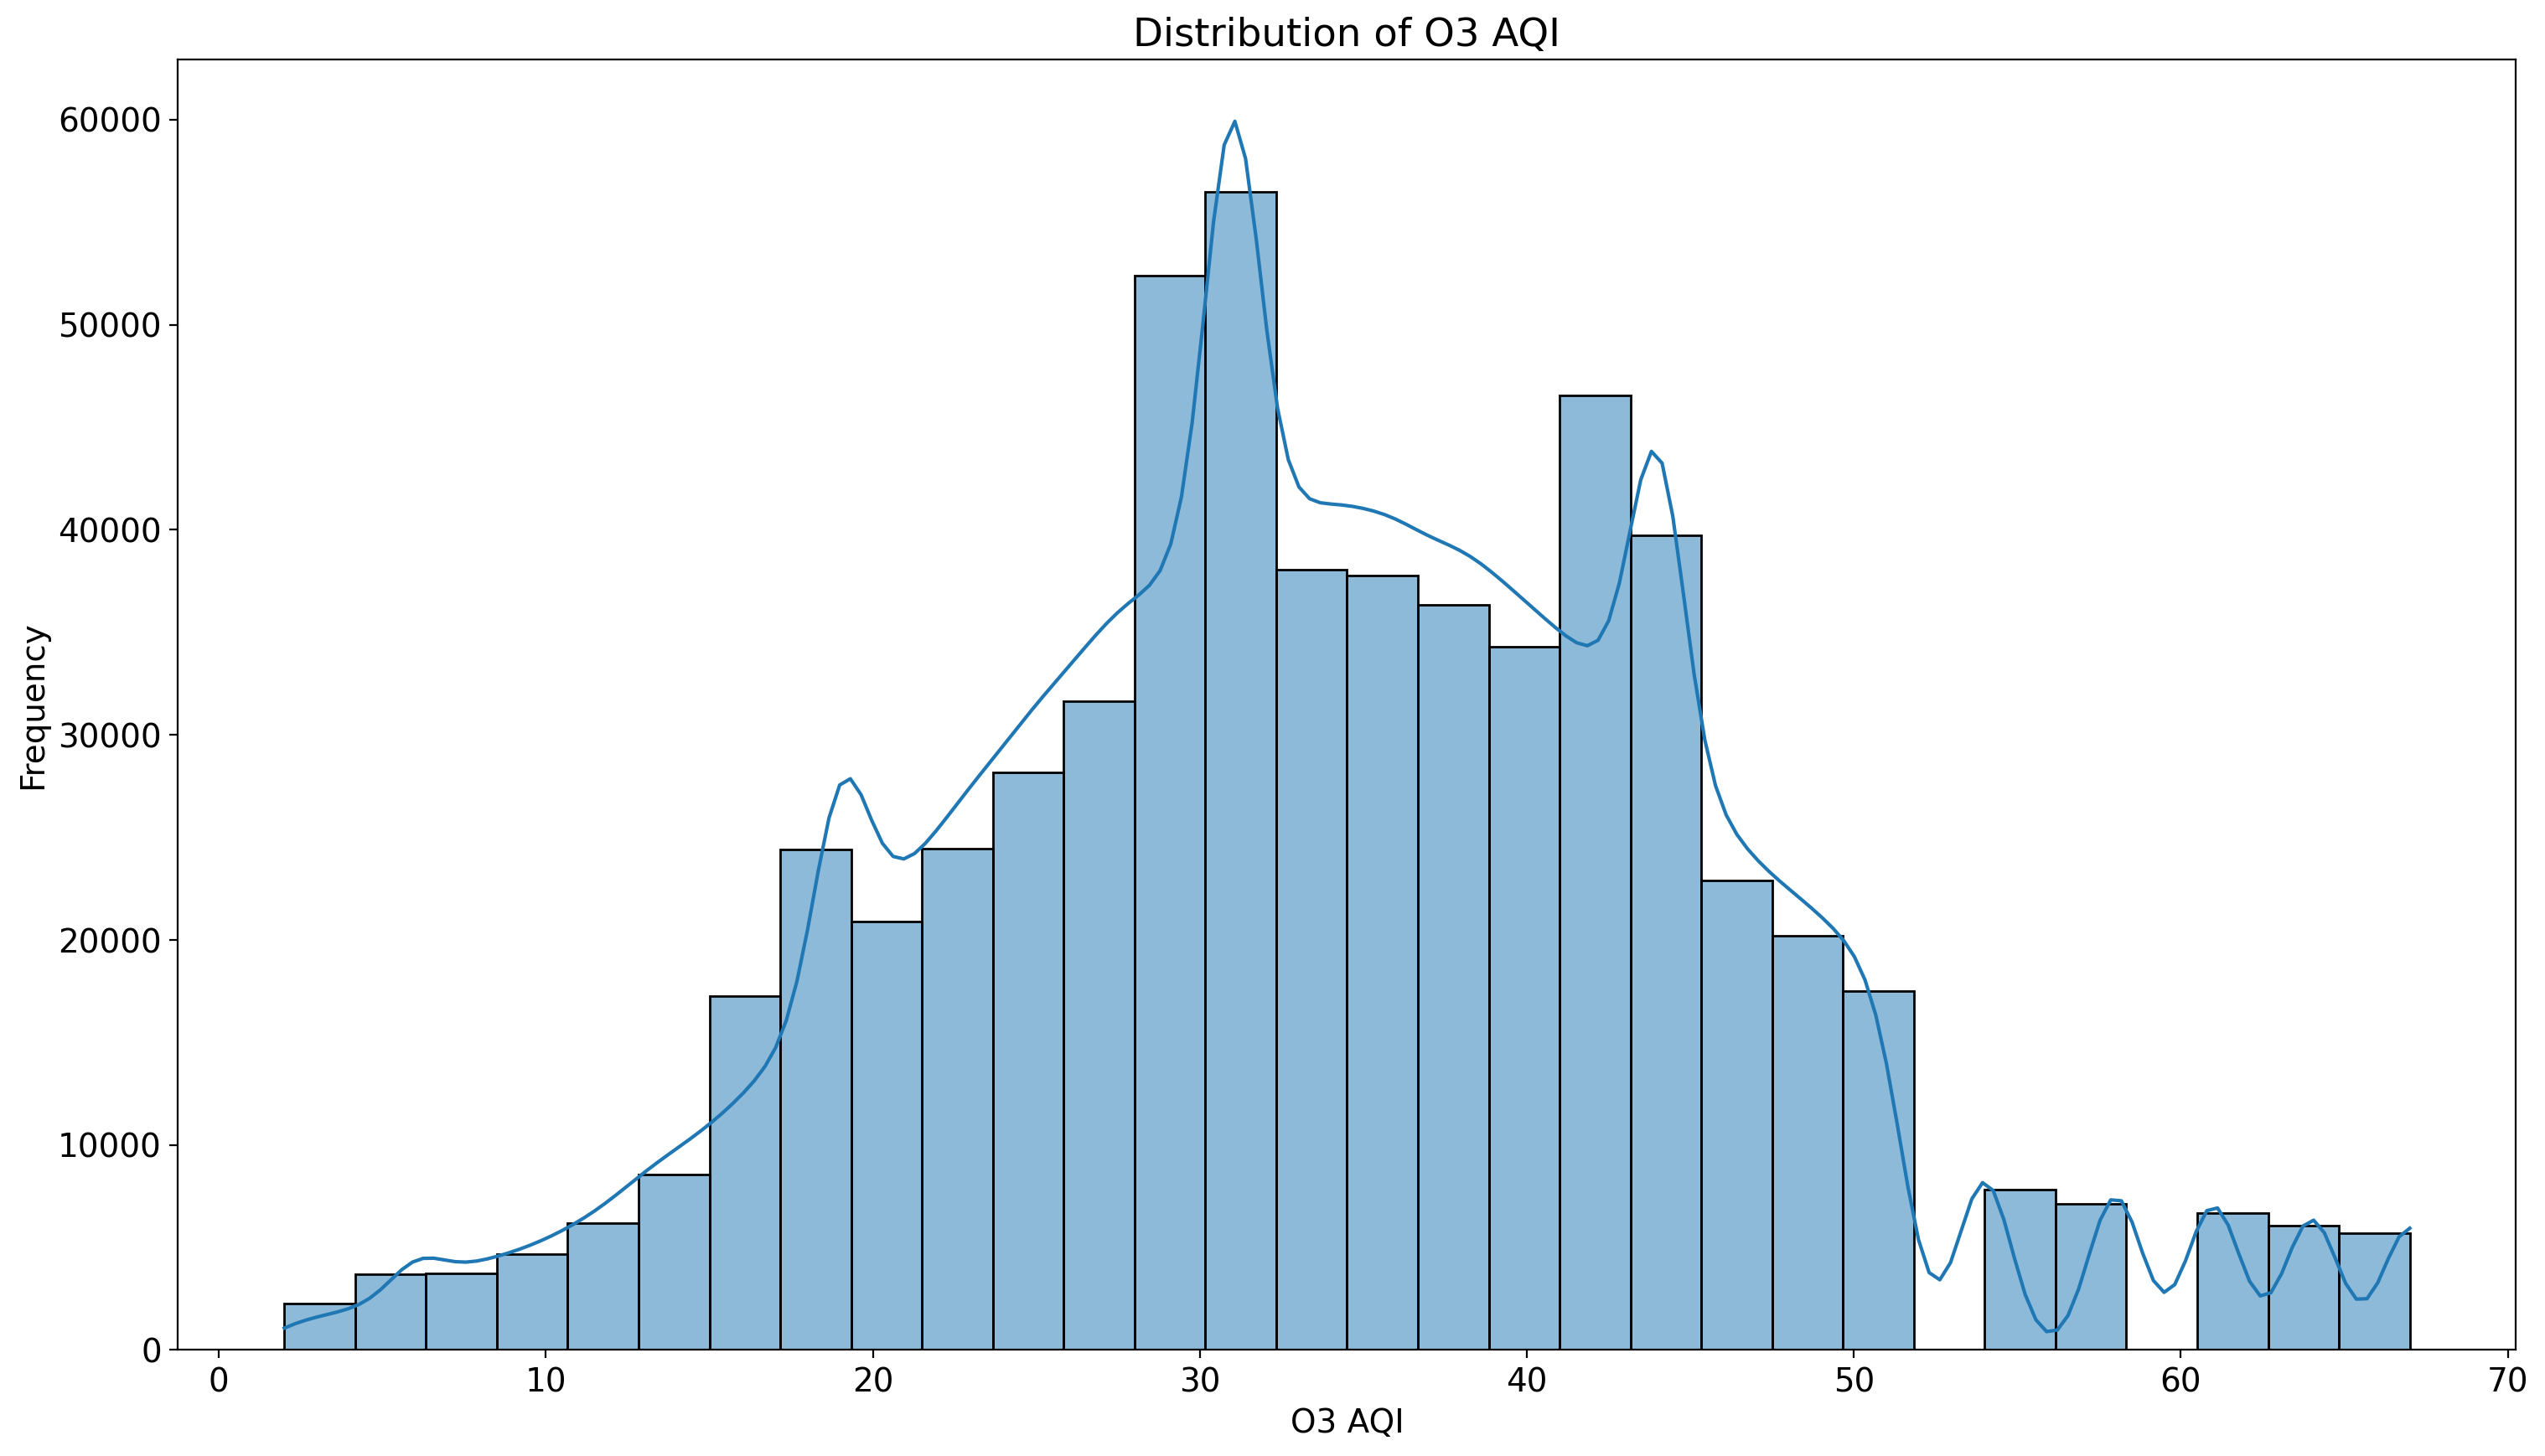

In [ ]:
# 3)  Visualize the distribution of the target variable to understand its range and skewness.
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['O3 AQI'], kde=True, bins=30)
plt.title('Distribution of O3 AQI')
plt.xlabel('O3 AQI')
plt.ylabel('Frequency')
plt.show()


In [93]:
# 4)  Find which features are most correlated with the target column (O3 AQI).
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlations with 'O3 AQI'
if 'O3 AQI' in correlation_matrix.columns:
    print(correlation_matrix['O3 AQI'].sort_values(ascending=False))
else:
    print("Column 'O3 AQI' is not in the dataset after selecting numeric columns.")



O3 AQI               1.0000
O3 1st Max Value     0.9909
O3 Mean              0.8576
Unnamed: 0           0.0342
SO2 1st Max Hour    -0.0253
SO2 1st Max Value   -0.0432
SO2 AQI             -0.0464
NO2 1st Max Value   -0.0642
NO2 AQI             -0.0652
O3 1st Max Hour     -0.0659
NO2 1st Max Hour    -0.0799
SO2 Mean            -0.0949
CO 1st Max Hour     -0.1078
CO AQI              -0.1959
CO 1st Max Value    -0.1960
CO Mean             -0.1976
NO2 Mean            -0.2172
Name: O3 AQI, dtype: float64


In [122]:
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')


In [123]:
# 5) Build a simple linear regression model to predict O3 AQI.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop non-numeric or irrelevant columns
df = data.drop(['Date', 'Address', 'State', 'County', 'City'], axis=1)

# Ensure all columns are numeric
data = data.select_dtypes(include=['float64', 'int64'])

# Separate features and target
X = data.drop(['O3 AQI'], axis=1)
y = data['O3 AQI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 2.486806499526967


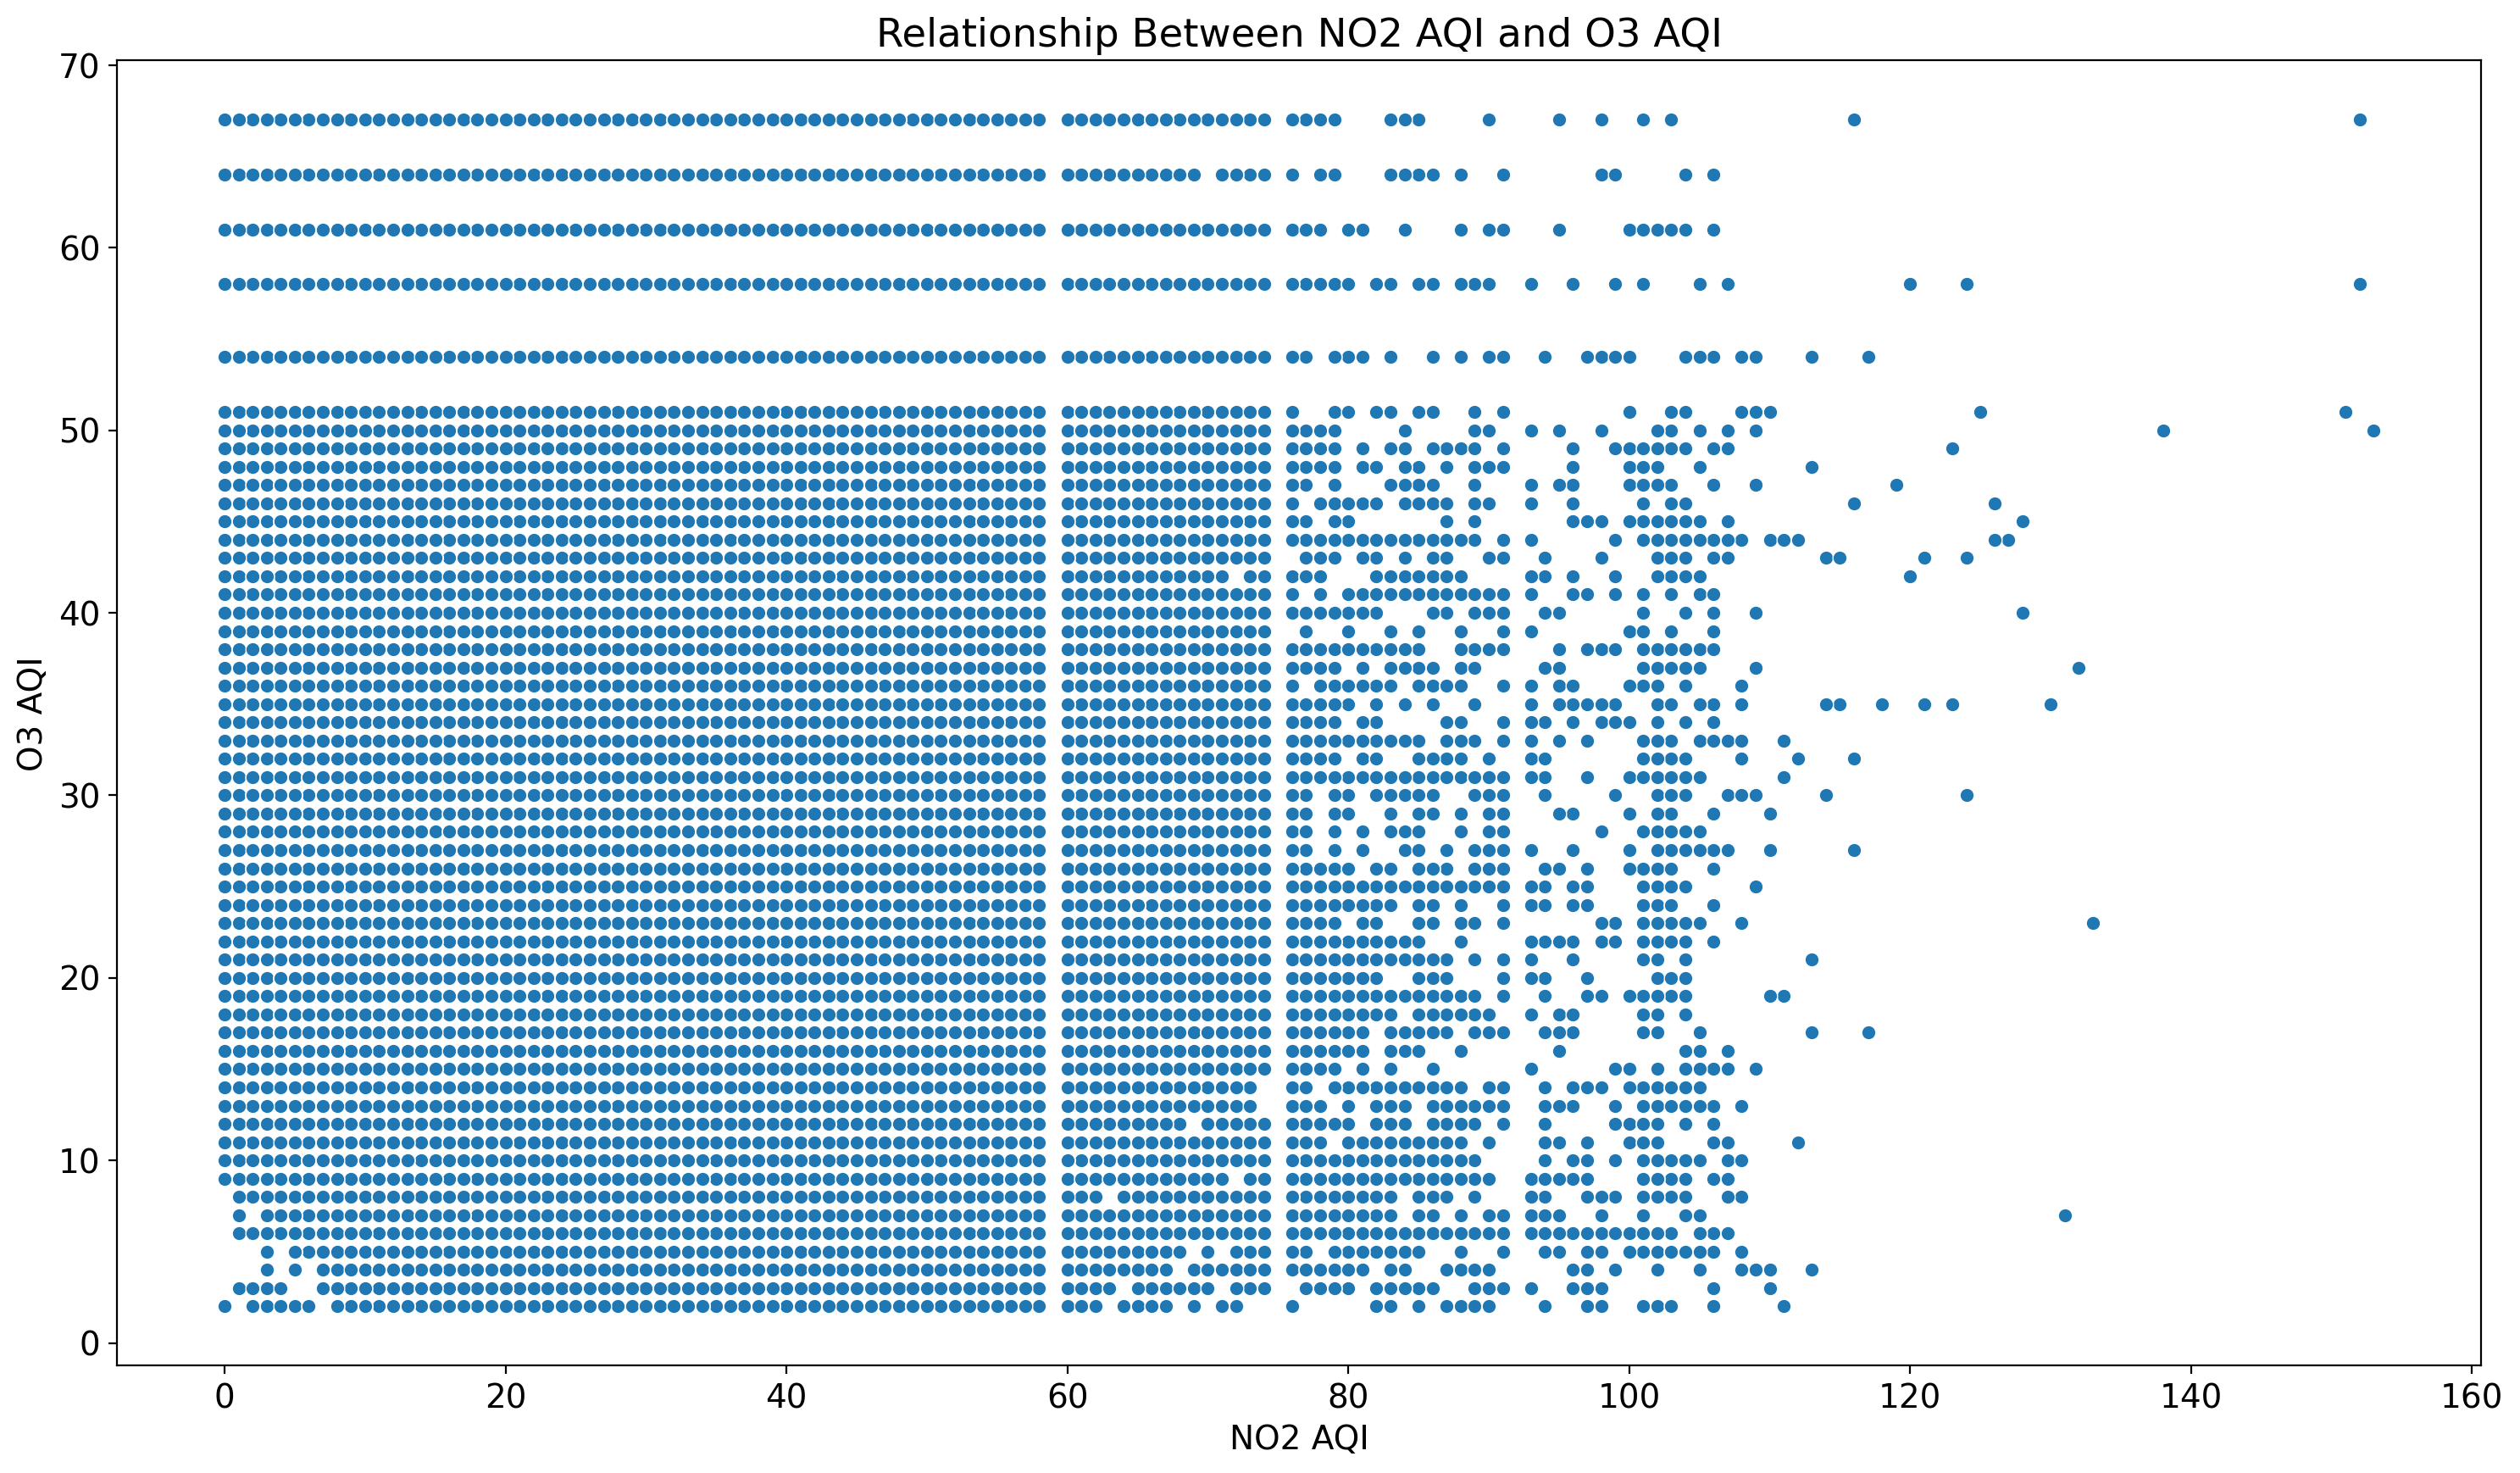

In [124]:
# 6) Create a scatter plot to examine the relationship between O3 AQI and NO2 AQI.
sns.scatterplot(data=data, x='NO2 AQI', y='O3 AQI')
plt.title('Relationship Between NO2 AQI and O3 AQI')
plt.xlabel('NO2 AQI')
plt.ylabel('O3 AQI')
plt.show()


C:\Users\rupsy\AppData\Local\Temp\ipykernel_12000\1081579135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Date'] = pd.date_range(start='2000-01-01', periods=len(data_subset))


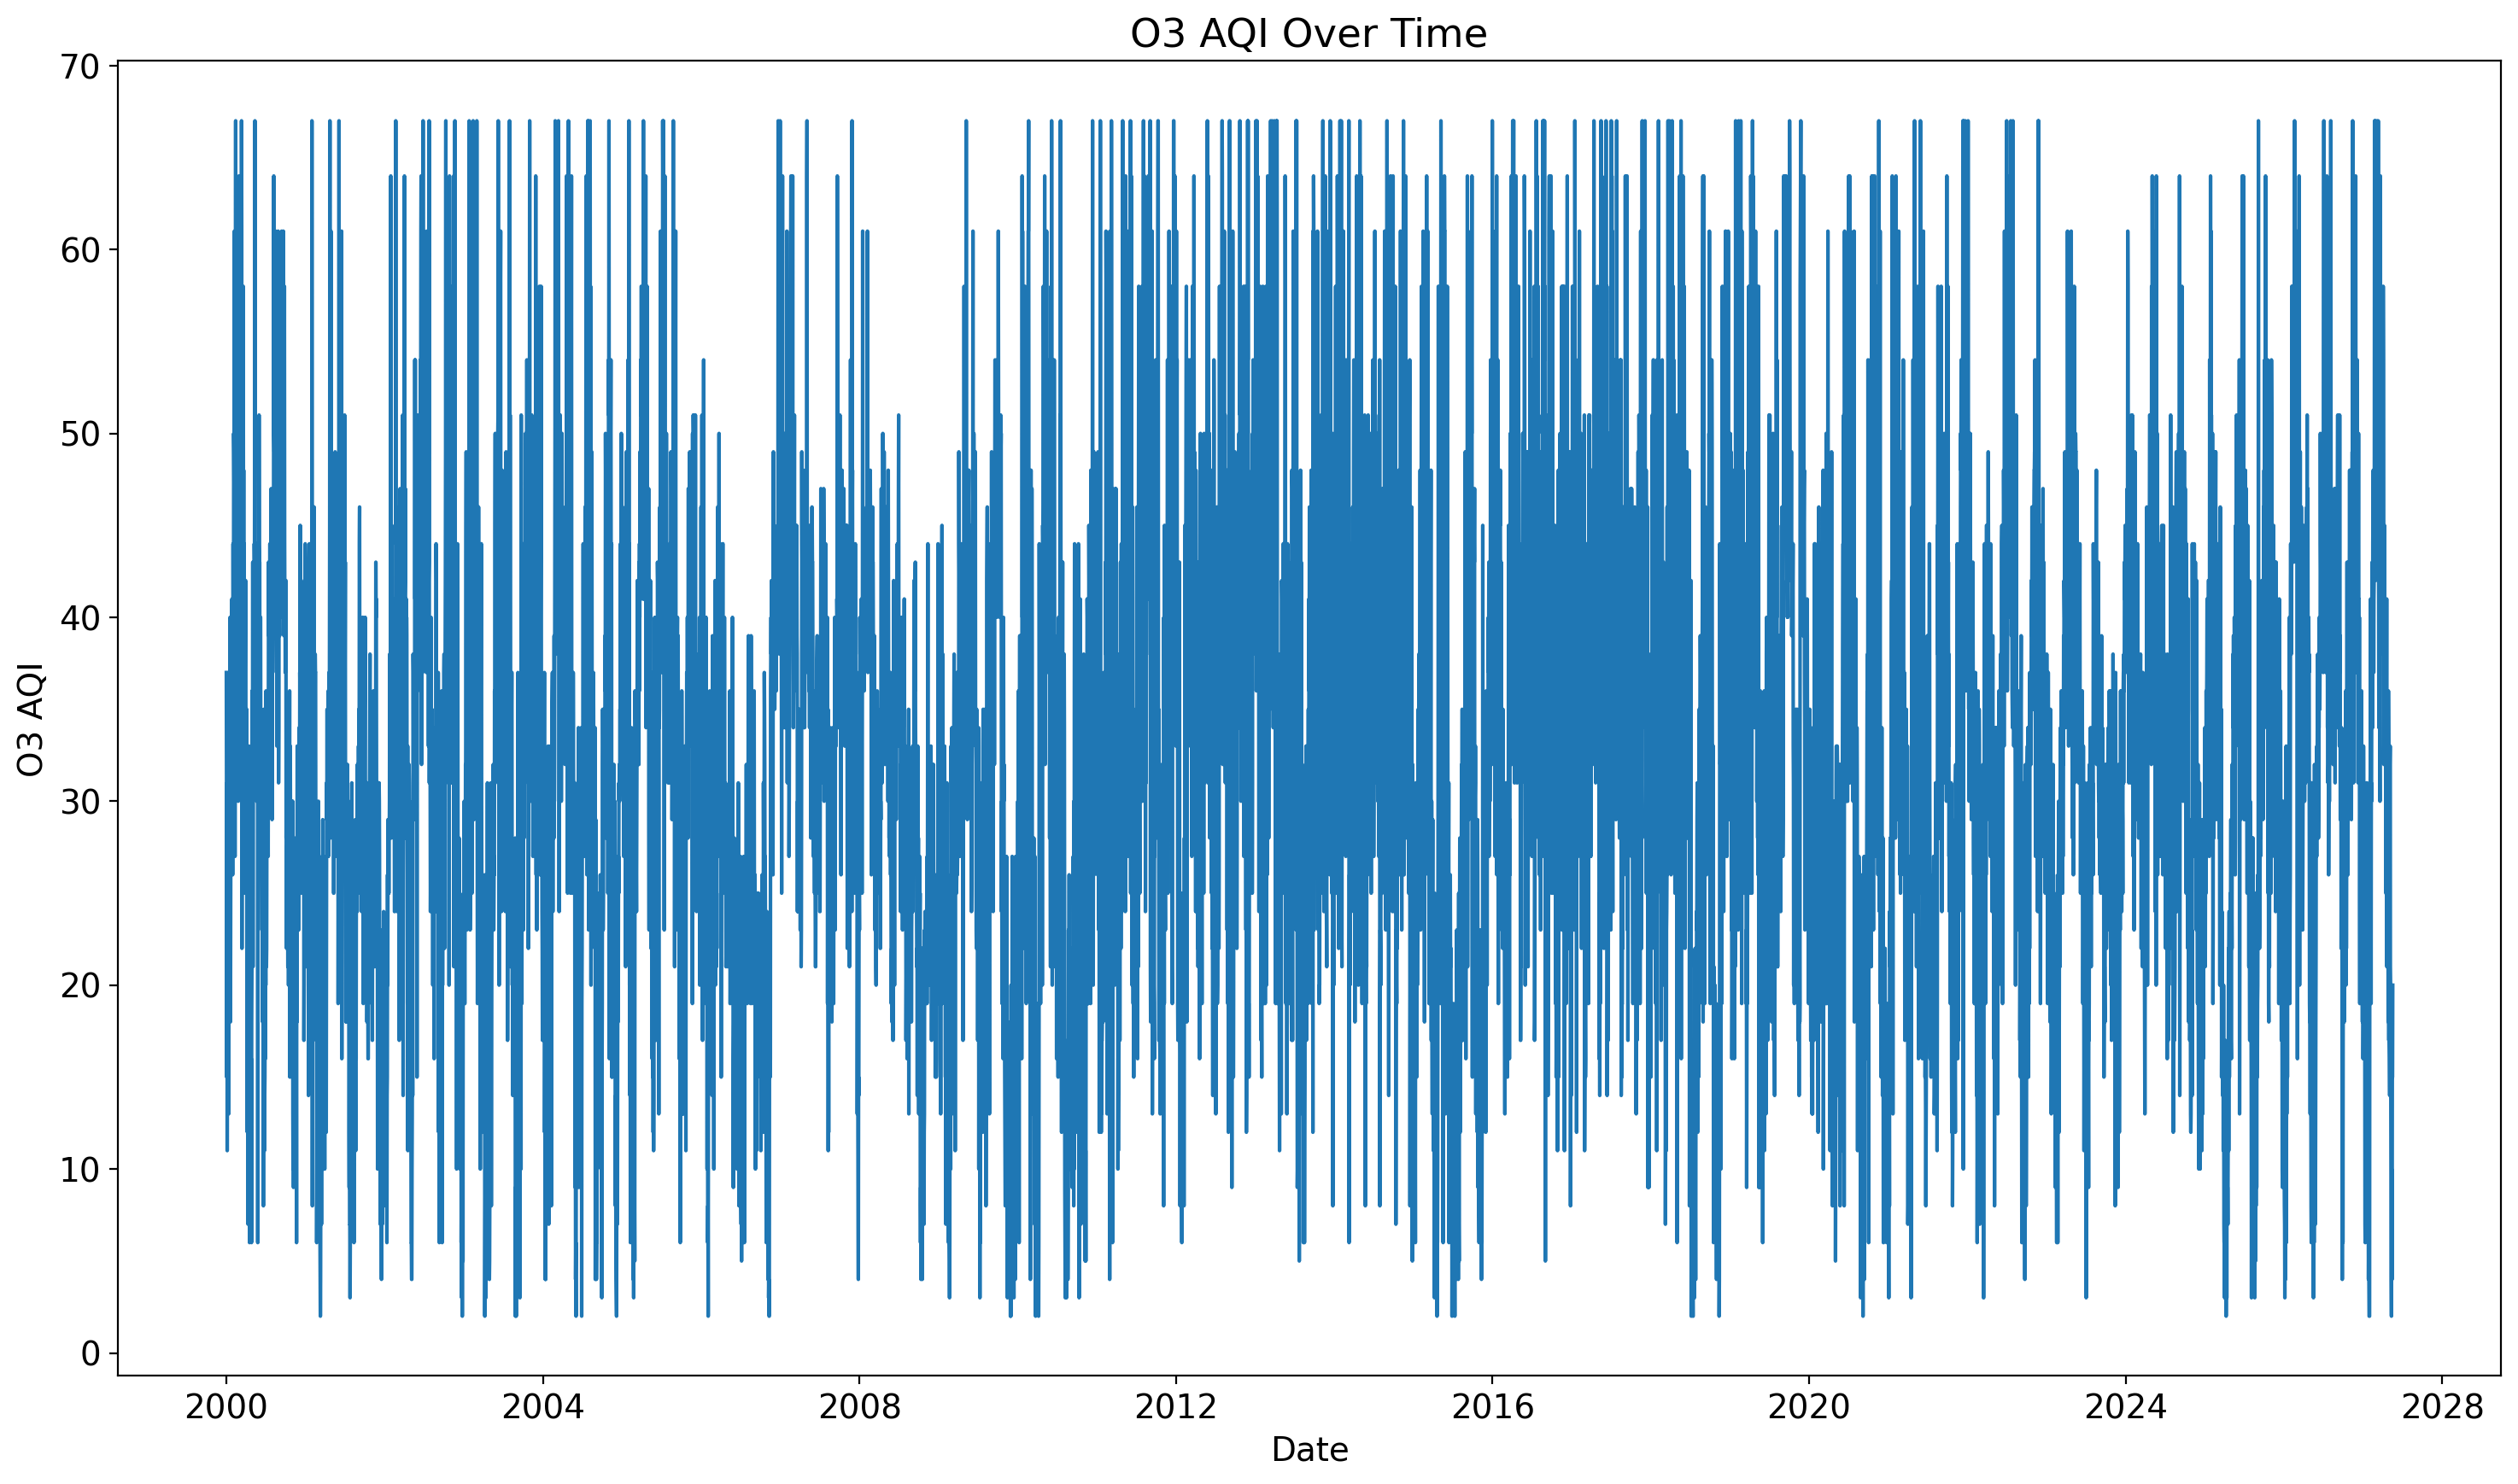

In [180]:
# 7) Analyze how O3 AQI changes over time.
# Use only the first 10,000 rows for date generation
data_subset = data.head(10000)
data_subset['Date'] = pd.date_range(start='2000-01-01', periods=len(data_subset))

# Sort data by Date
data_sorted = data_subset.sort_values(by='Date')

# Plot O3 AQI over time
plt.plot(data_sorted['Date'], data_sorted['O3 AQI'])
plt.title('O3 AQI Over Time')
plt.xlabel('Date')
plt.ylabel('O3 AQI')
plt.show()




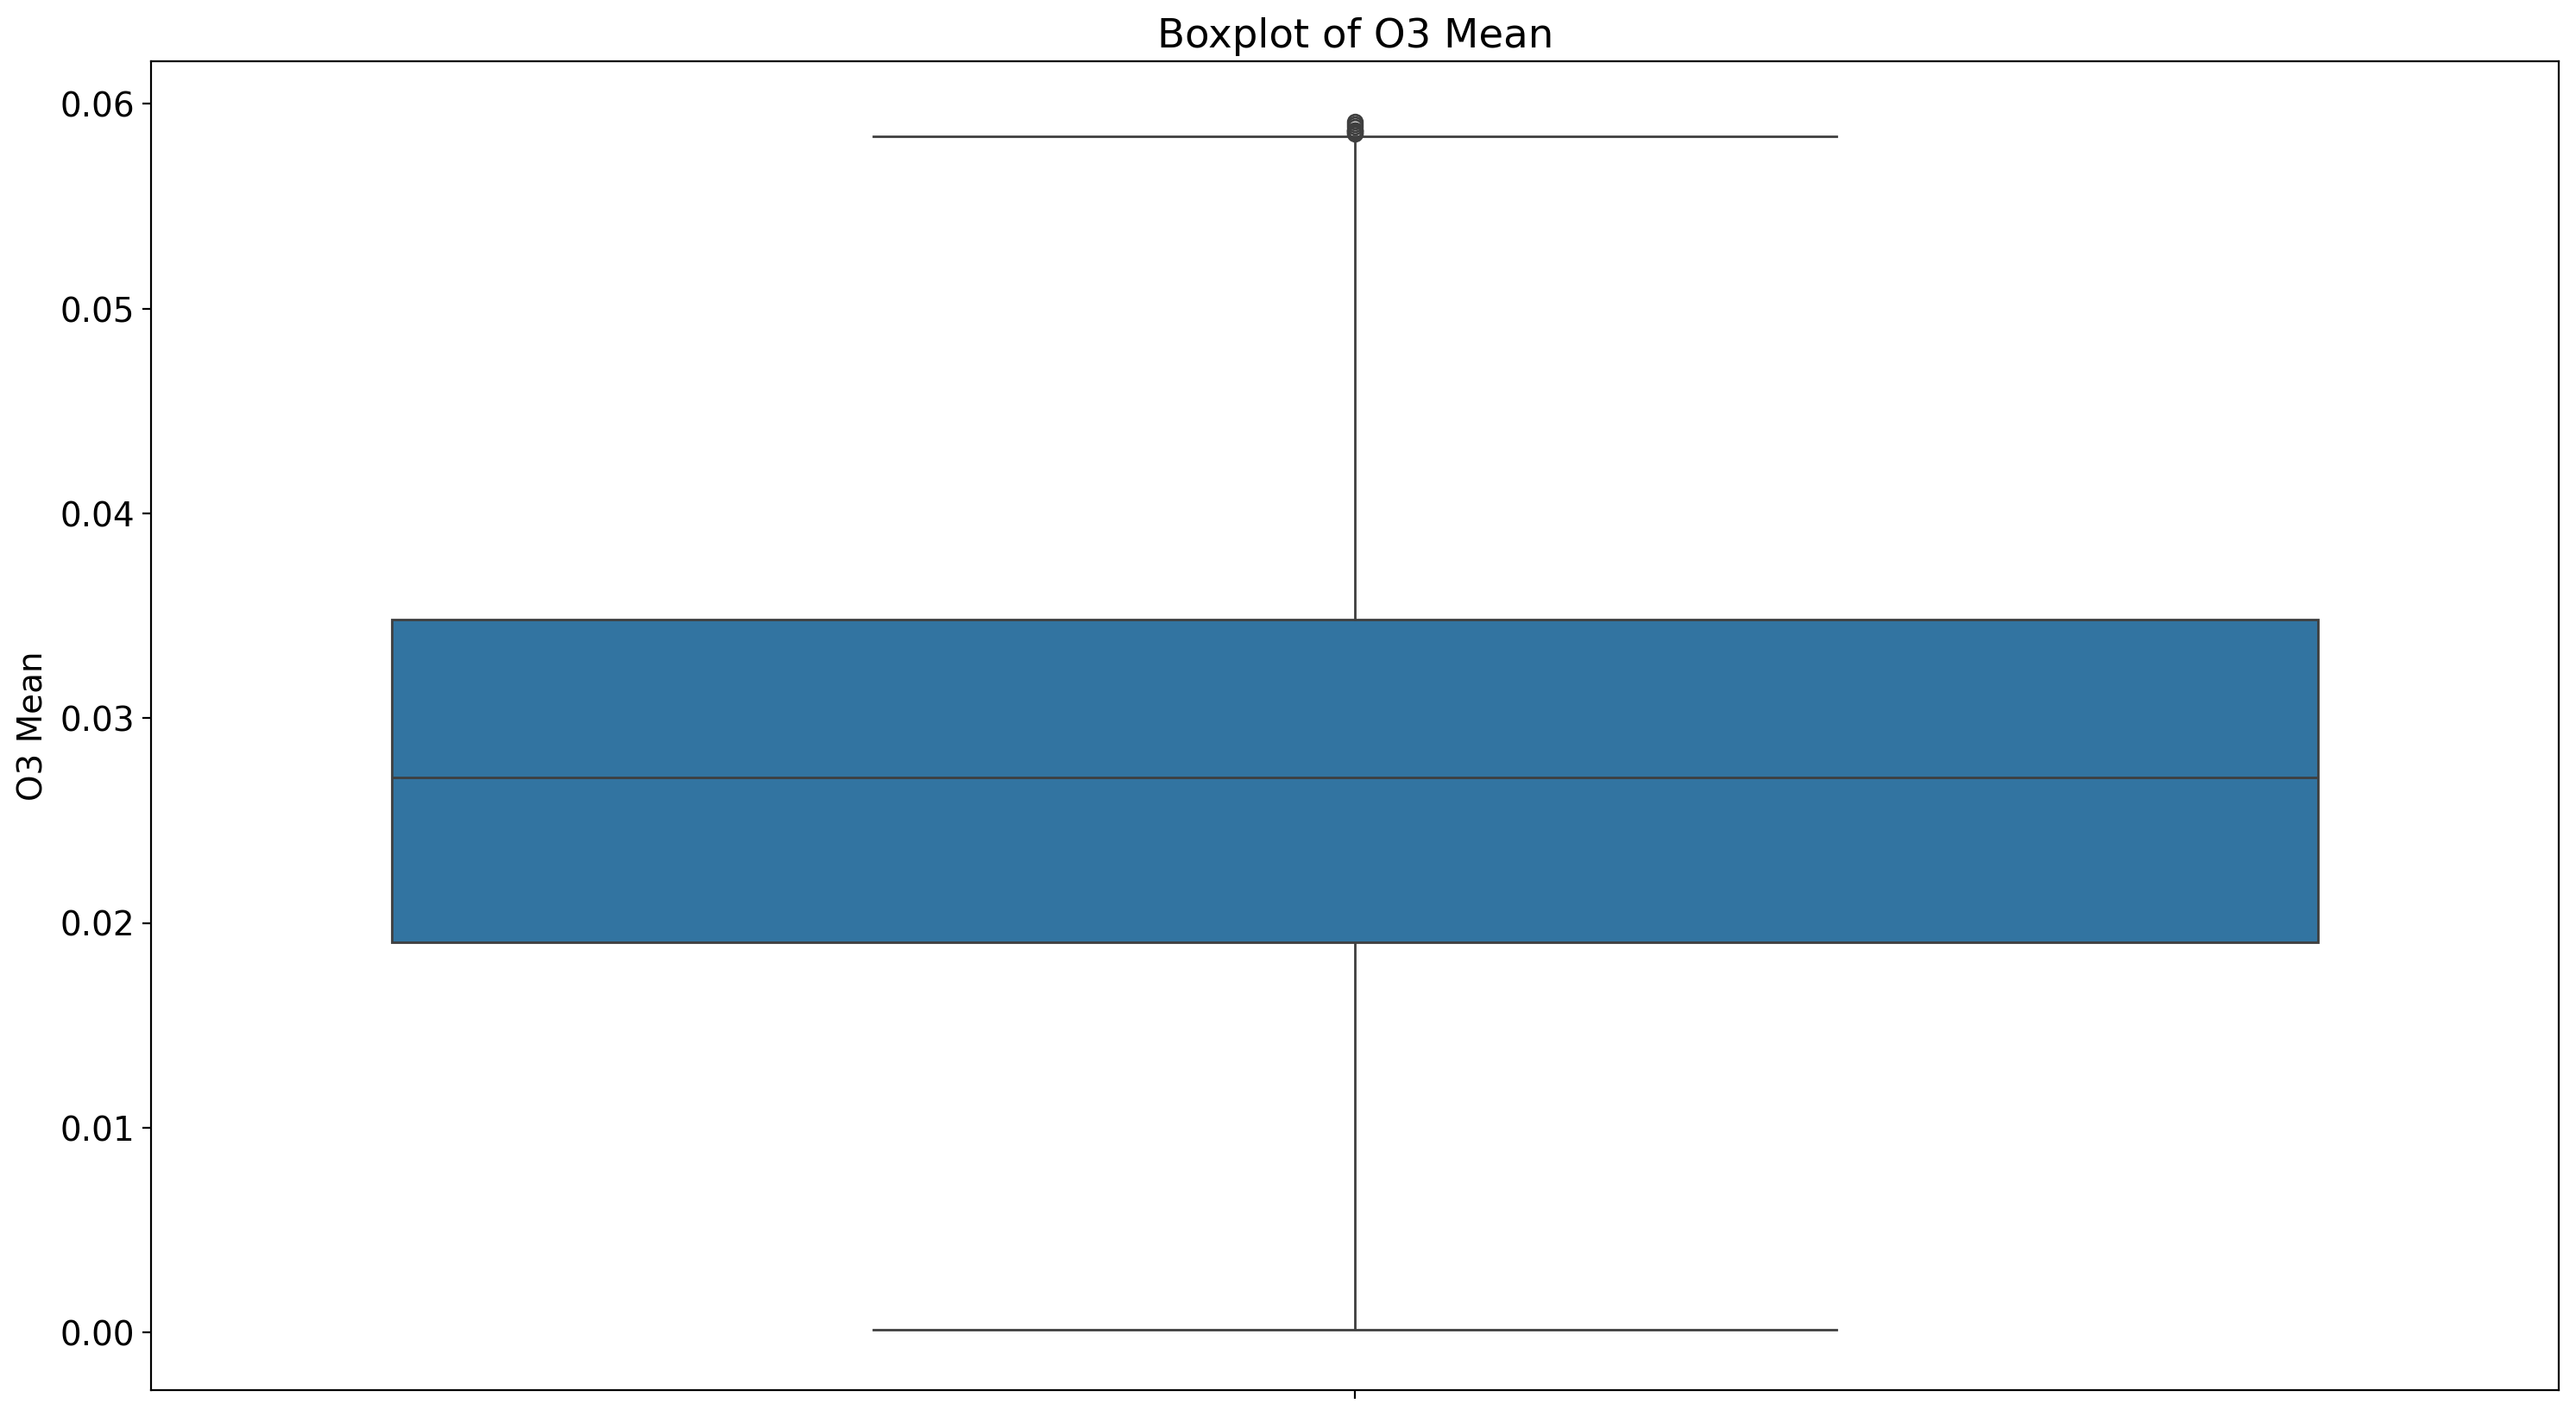

In [156]:
# 8) Identify outliers in the O3 Mean column using a boxplot.
sns.boxplot(data['O3 Mean'])
plt.title('Boxplot of O3 Mean')
plt.show()


In [157]:
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')


In [169]:
# 9) Calculate the average O3 AQI for each city.
data.columns = data.columns.str.strip()
city_avg = data.groupby('City')['O3 AQI'].mean()
print(city_avg)



City
Albuquerque      40.8739
Alexandria       37.2467
Altoona          39.0442
Annandale        32.3837
Arden-Arcade     35.3211
                  ...   
Wilkes-Barre     39.6701
Wilmington       32.8497
Winston-Salem    41.8103
Winter Park      35.1350
York             36.3015
Name: O3 AQI, Length: 150, dtype: float64


In [162]:
# 10) Create new features for the month and year from the Date column.
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


C:\Users\rupsy\AppData\Local\Temp\ipykernel_12000\2772857529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [163]:
data = data.dropna(subset=['Date'])


In [164]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
print(data[['Date', 'Year', 'Month']].head())


        Date  Year  Month
0 2000-01-01  2000      1
1 2000-02-01  2000      2
2 2000-03-01  2000      3
3 2000-04-01  2000      4
4 2000-05-01  2000      5


C:\Users\rupsy\AppData\Local\Temp\ipykernel_12000\2174662089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year
C:\Users\rupsy\AppData\Local\Temp\ipykernel_12000\2174662089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month


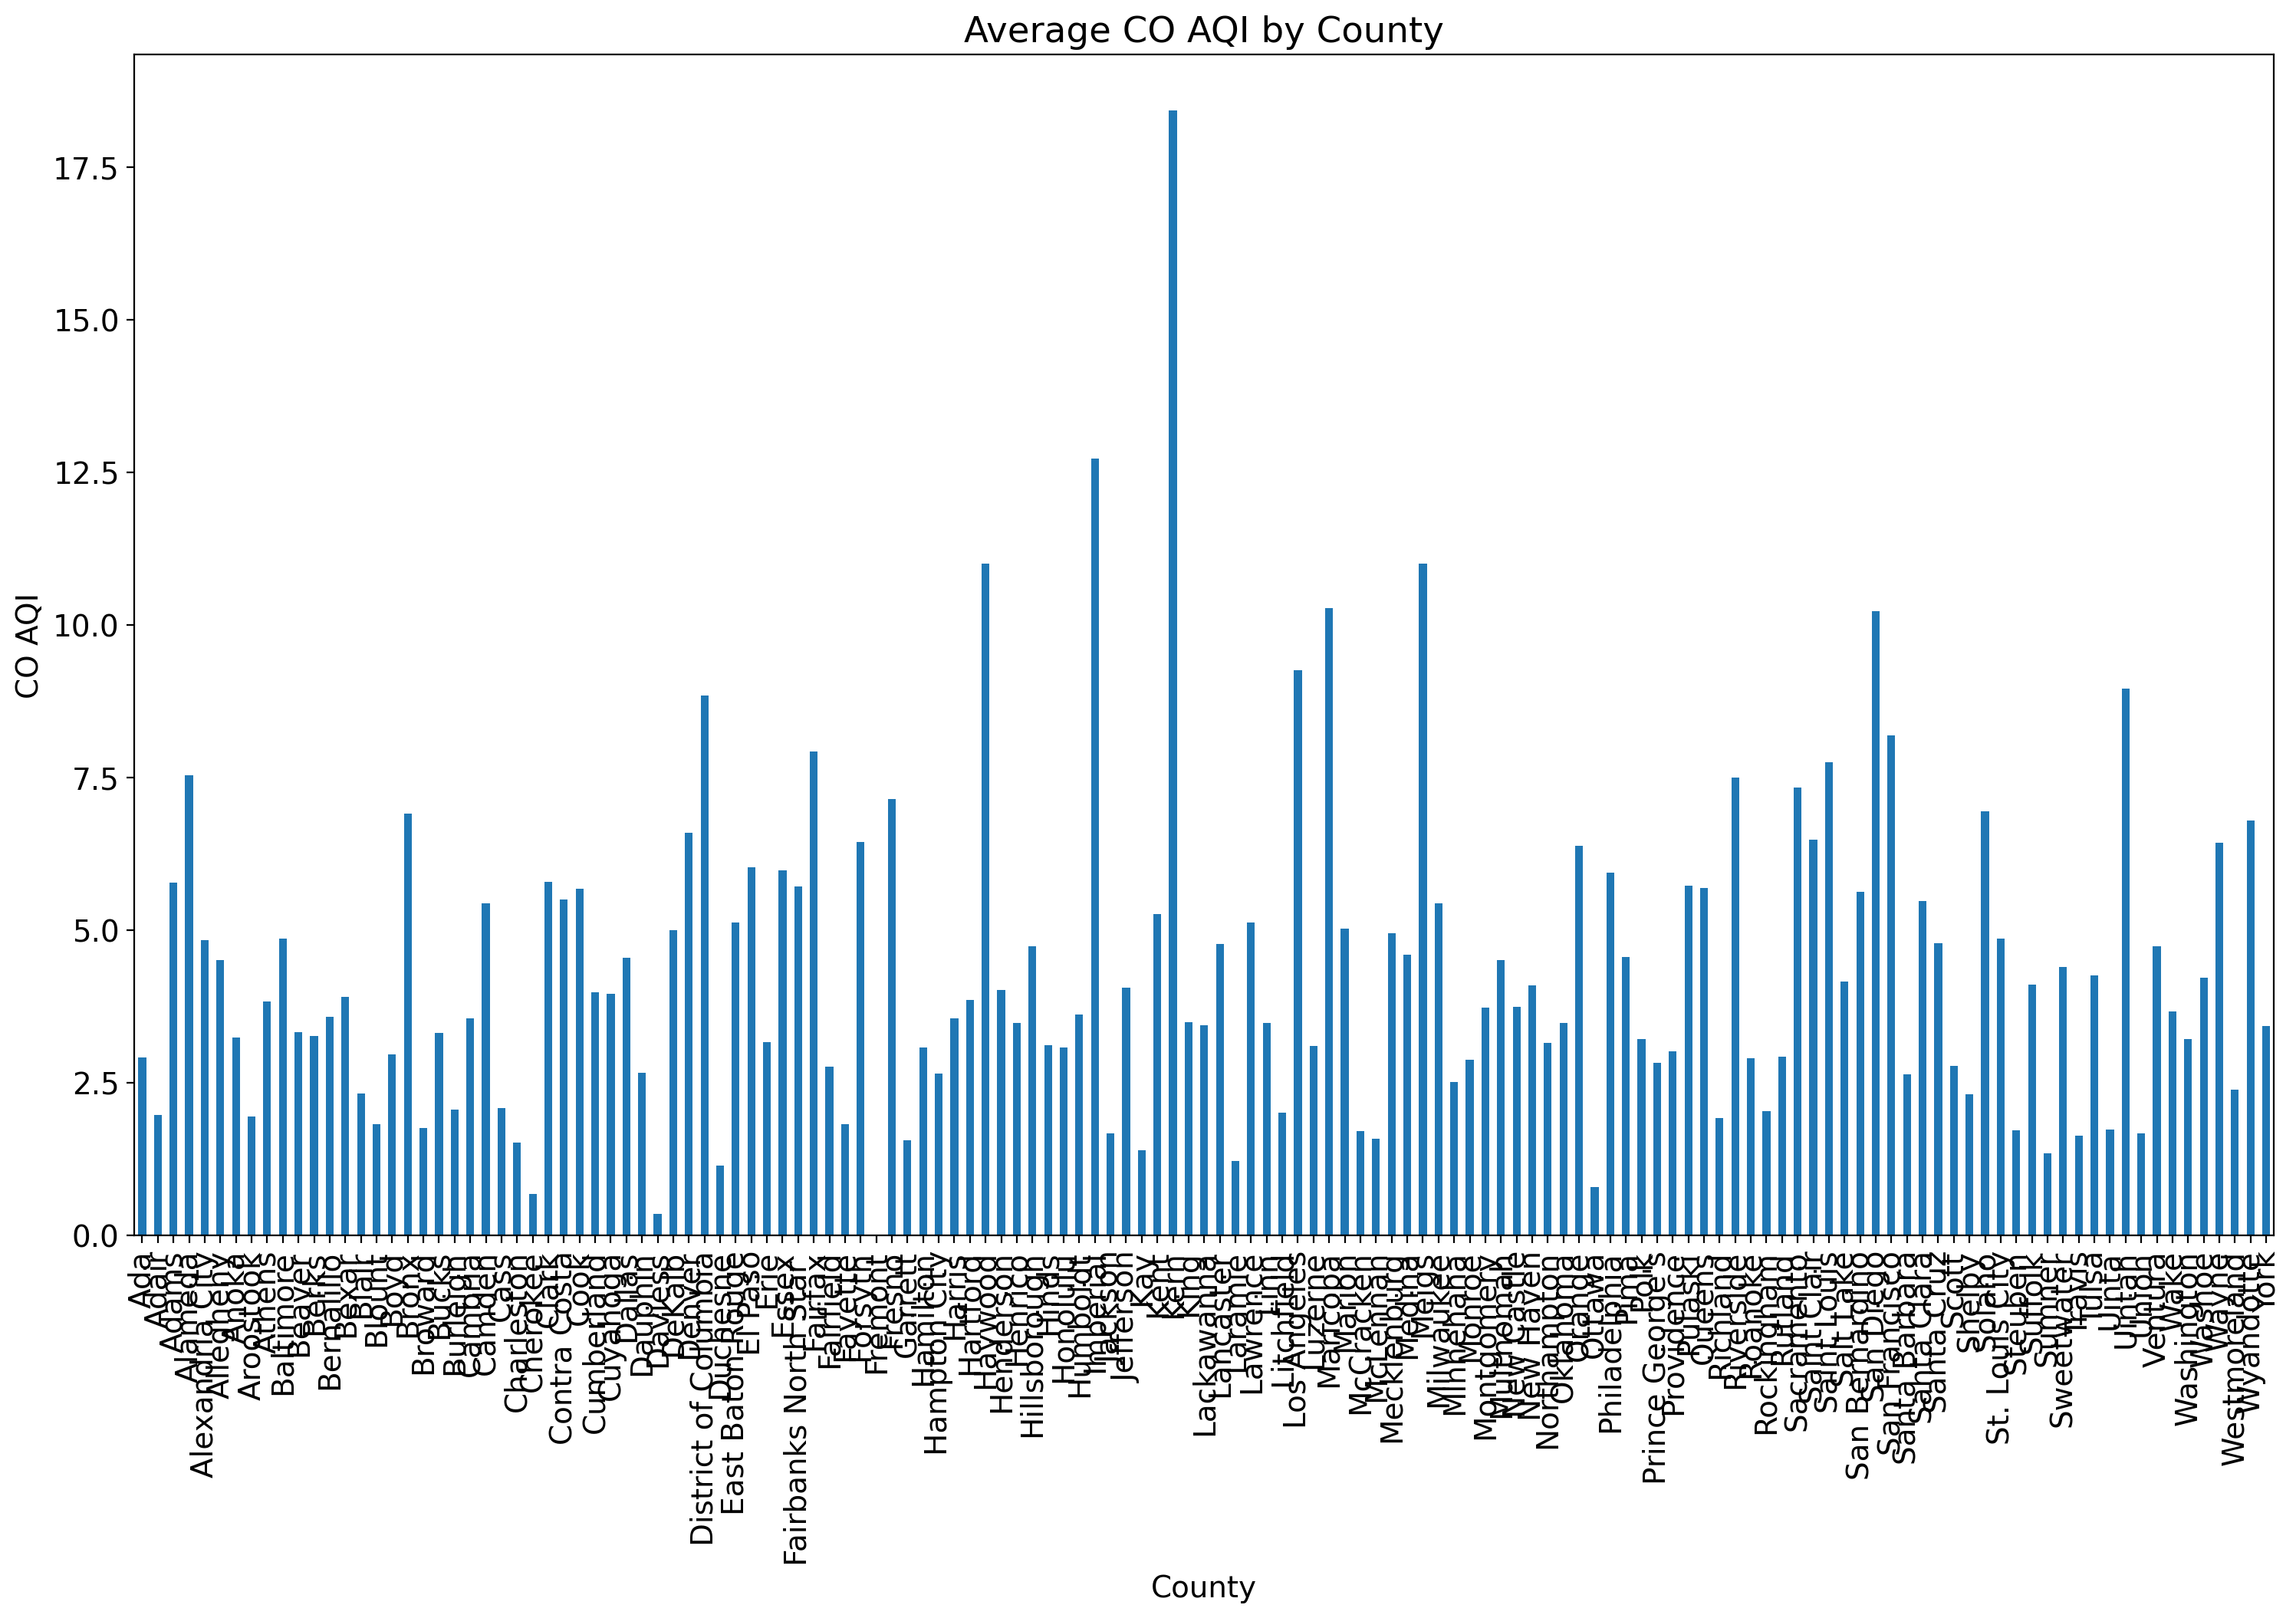

In [170]:
# 11) Visualize the average CO AQI for different counties.
county_avg = data.groupby('County')['CO AQI'].mean()

county_avg.plot(kind='bar')
plt.title('Average CO AQI by County')
plt.xlabel('County')
plt.ylabel('CO AQI')
plt.show()


In [171]:
# 12) Scale all numeric columns to have a mean of 0 and standard deviation of 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include='number')), columns=data.select_dtypes(include='number').columns)
print(data_scaled.head())


   Unnamed: 0  O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  CO Mean  \
0     -1.7657  -0.6558            0.3064          -0.2297  0.2535   1.9639   
1     -1.7657  -1.0154           -0.3586          -0.2297 -0.3344   2.6363   
2     -1.7657  -1.6200           -1.6886          -0.5229 -1.5941   5.1287   
3     -1.7657  -1.0154           -0.2755          -0.5229 -0.2504   5.3674   
4     -1.7657  -1.8052           -2.0211          -0.5229 -1.9301   8.4866   

   CO 1st Max Value  CO 1st Max Hour  CO AQI  SO2 Mean  SO2 1st Max Value  \
0            3.9279           2.1836  3.8830    0.6826             0.7114   
1            4.1547          -0.7642  4.0799    0.2477            -0.0976   
2            4.6083           0.2611  4.4736    1.6218             0.9810   
3            5.7423           2.1836  5.6546    2.3872             1.6551   
4            7.3300          -0.5079  7.2294    3.0655             1.5203   

   SO2 1st Max Hour  SO2 AQI  NO2 Mean  NO2 1st Max Value  NO2 1st M

In [174]:
# 13) Select the top 5 features most correlated with O3 AQI.
#Identify non-numeric columns and process them appropriately.
print(X.dtypes)
#Drop Non-Numeric Columns: Remove columns that cannot be directly used.
X_numeric = X.select_dtypes(include=['float64', 'int64'])
#Convert categorical data into numeric format using techniques like one-hot encoding or label encoding.
X_encoded = pd.get_dummies(X, drop_first=True)
#If the dataset includes date columns, extract numeric features like year, month, or day.
X['Year'] = pd.to_datetime(X['Date'], errors='coerce').dt.year
X['Month'] = pd.to_datetime(X['Date'], errors='coerce').dt.month
X = X.drop(columns=['Date'])  # Drop the original Date column
#After cleaning the dataset, apply SelectKBest:
from sklearn.feature_selection import SelectKBest, f_regression

# Ensure only numeric columns are used
X_numeric = X.select_dtypes(include=['float64', 'int64'])
selector = SelectKBest(score_func=f_regression, k=5)

X_new = selector.fit_transform(X_numeric, y)
print("Selected features:", X_numeric.columns[selector.get_support()])




Unnamed: 0             int64
Date                  object
Address               object
State                 object
County                object
City                  object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI                 int64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI                int64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
dtype: object


ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

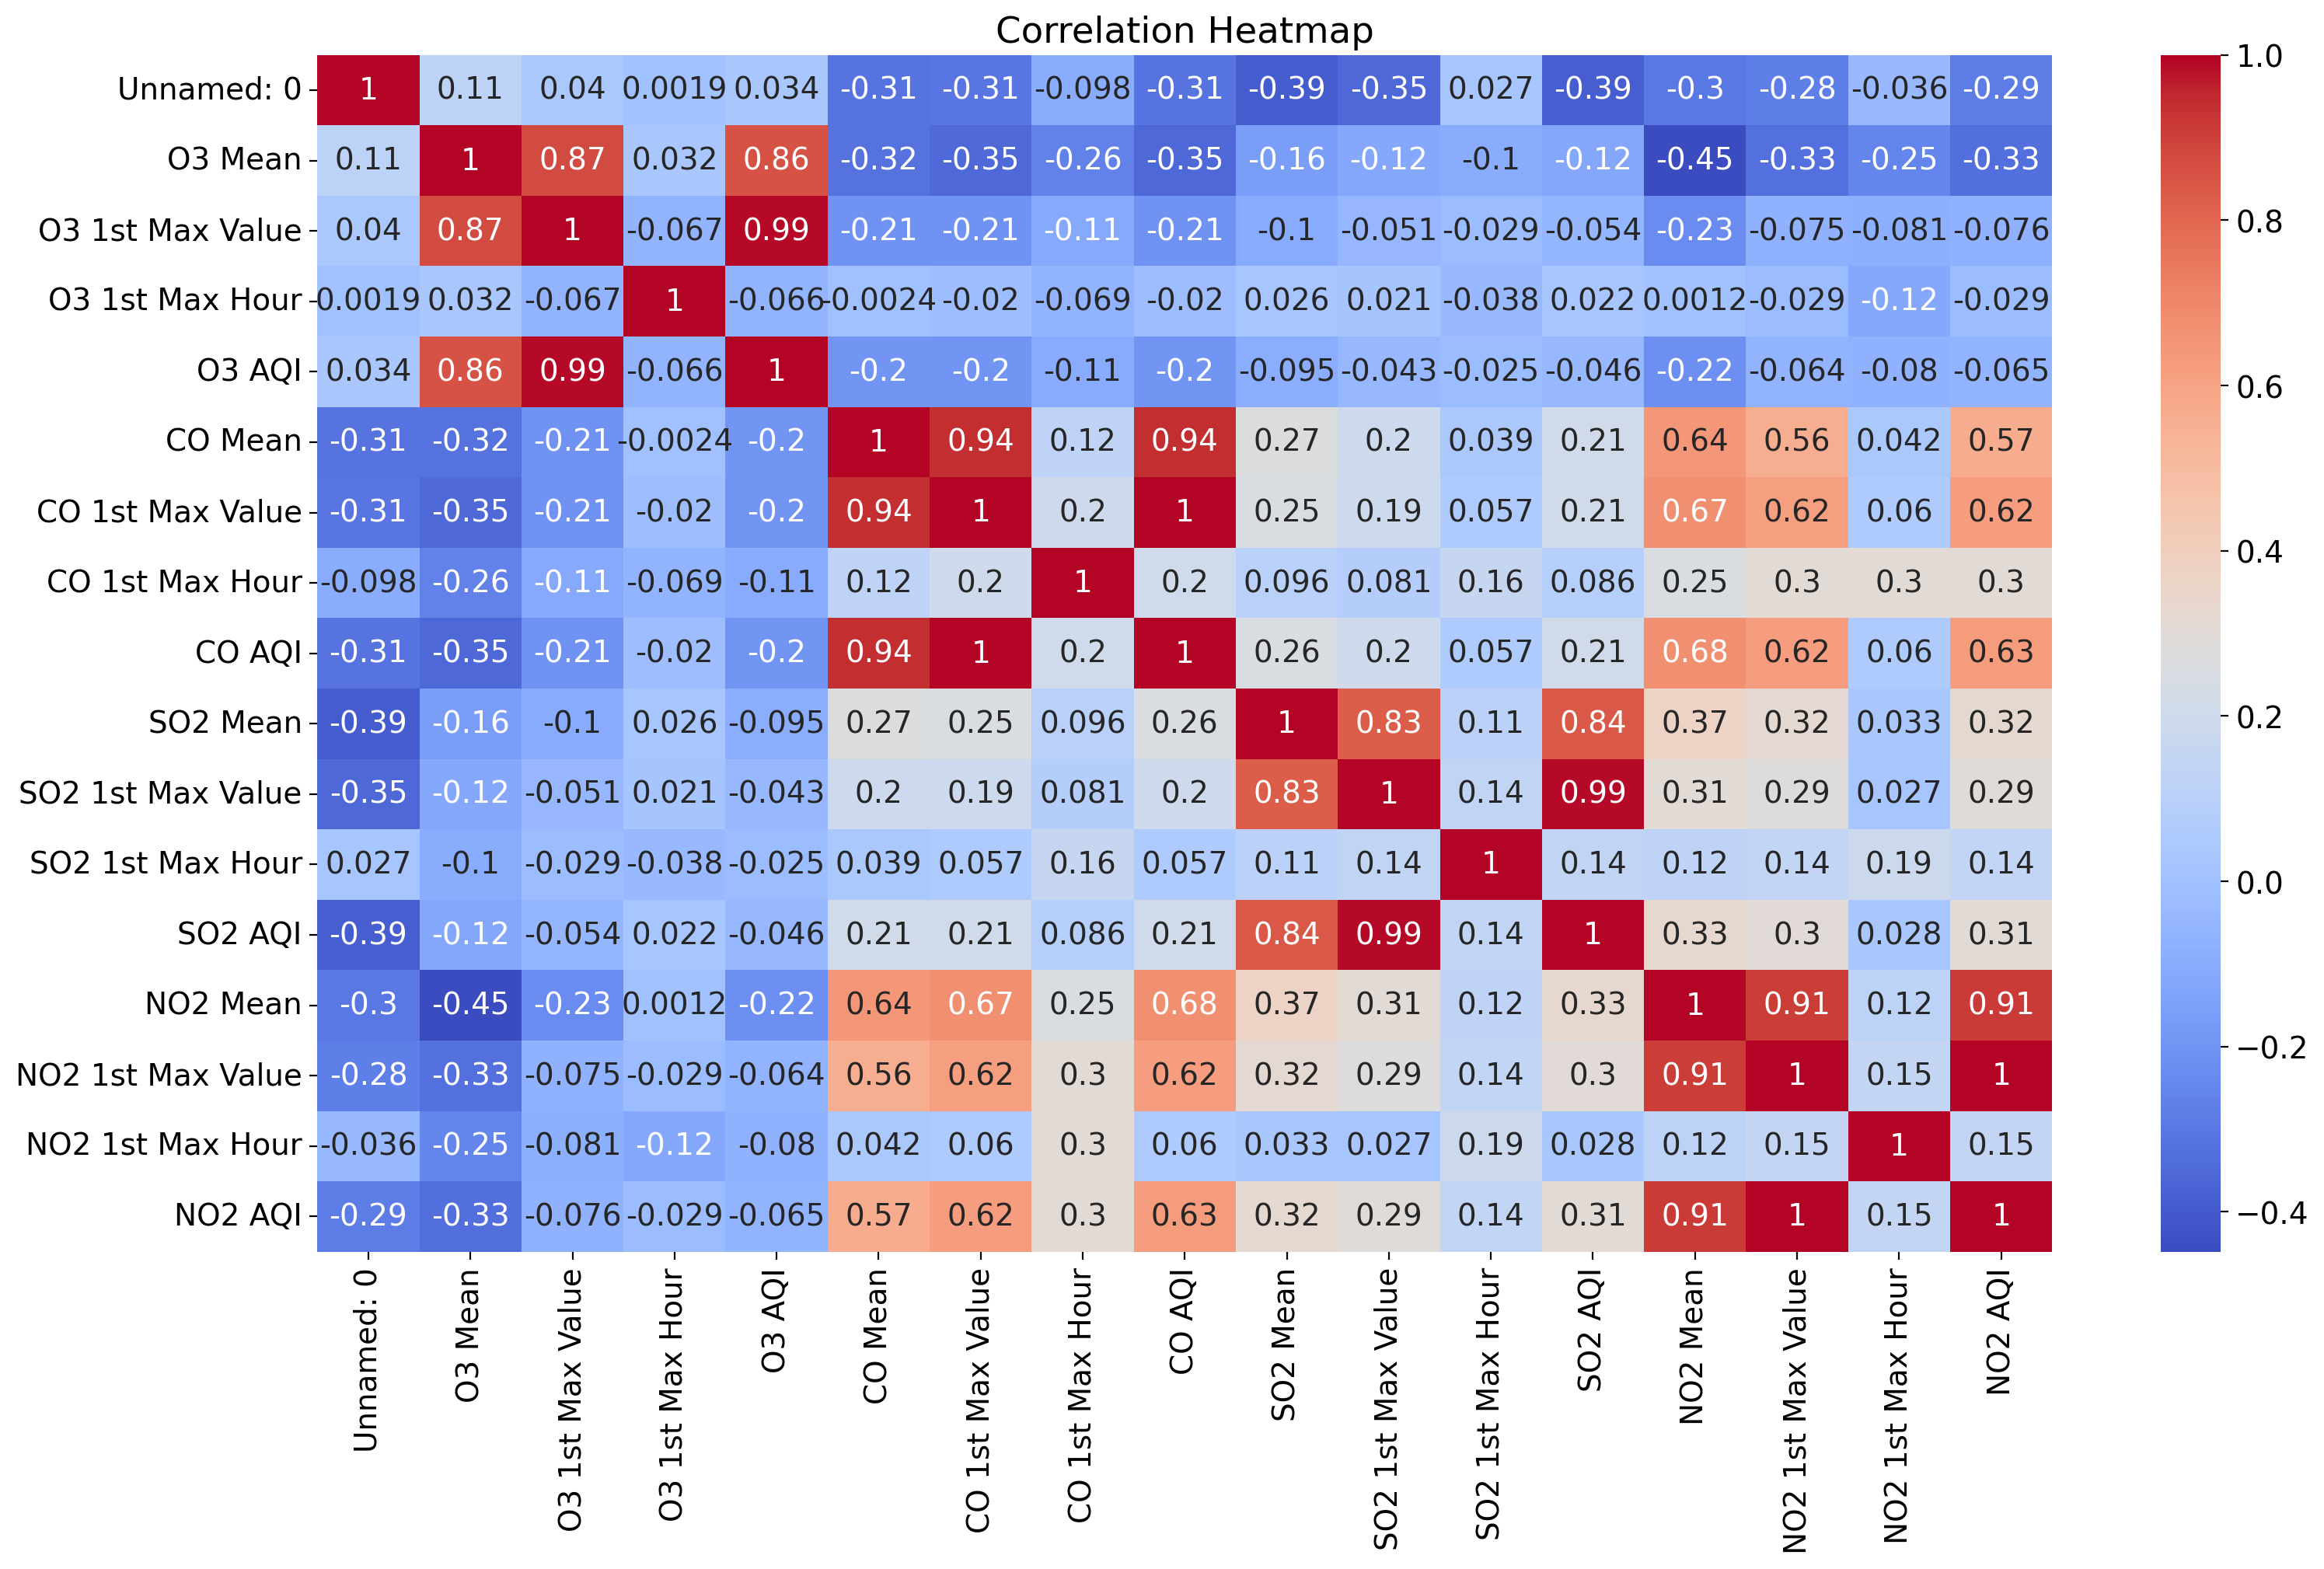

In [175]:
# 14) Visualize the correlation matrix with a heatmap.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [177]:
# 15)  Use cross-validation to evaluate the linear regression model.
# Target variable
y = data['O3 AQI']

# Features
X = data.drop(columns=['O3 AQI'])

# Drop irrelevant columns
X = X.drop(columns=['Address', 'State', 'County', 'City'], errors='ignore')

# Process date columns
X['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year
X['Month'] = pd.to_datetime(data['Date'], errors='coerce').dt.month
X = X.drop(columns=['Date'], errors='ignore')

# Ensure numeric features
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(0)

# Perform cross-validation
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())


Cross-validated MSE: 2.4918311466600276
